# Load Data

## Visualize Data

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os


In [146]:
data_folder = 'EEG-Data'
os.chdir(data_folder)
print(os.getcwd())

/Users/aaron68lee/Documents/Coding-Projects/EEG-DL/EEG-Data


(2115, 22, 1000)


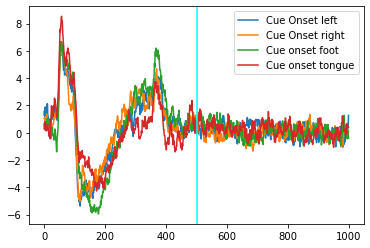

In [185]:
## Loading and visualizing the data

## Loading the dataset

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])






## Preprocess Data

In [ ]:
# apply label smoothing
'''
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Define label smoothing factor
epsilon = 0.1

# Load your data
# Assuming you already have X_train_valid_prep, X_test_prep, y_train_valid, y_test

# Random splitting and reshaping the data
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
x_train, x_valid = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
y_train, y_valid = y_train_valid[ind_train], y_train_valid[ind_valid]

# Convert labels to one-hot encoding
num_classes = 4
y_train = label_binarize(y_train, classes=range(num_classes))
y_valid = label_binarize(y_valid, classes=range(num_classes))
y_test = label_binarize(y_test, classes=range(num_classes))

# Apply label smoothing
y_train_smooth = (1 - epsilon) * y_train + epsilon / num_classes
y_valid_smooth = (1 - epsilon) * y_valid + epsilon / num_classes
y_test_smooth = (1 - epsilon) * y_test + epsilon / num_classes

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)

# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1, 3)
x_train = np.swapaxes(x_train, 1, 2)
x_valid = np.swapaxes(x_valid, 1, 3)
x_valid = np.swapaxes(x_valid, 1, 2)
x_test = np.swapaxes(x_test, 1, 3)
x_test = np.swapaxes(x_test, 1, 2)

print('Shape of training set after dimension reshaping:', x_train.shape)
print('Shape of validation set after dimension reshaping:', x_valid.shape)
print('Shape of test set after dimension reshaping:', x_test.shape)
print("Shape of smoothed training labels:", y_train_smooth.shape)
print("Shape of smoothed validation labels:", y_valid_smooth.shape)
print("Shape of smoothed test labels:", y_test_smooth.shape)
'''

In [186]:

## Preprocessing the dataset

X_train_valid_prep = X_train_valid[:,:,0:500]
X_test_prep = X_test[:,:,0:500]

print(X_train_valid_prep.shape)
print(y_train_valid.shape)
print(X_test_prep.shape)
print(y_test.shape)


## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

x_test = X_test_prep

'''
# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)

# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
'''

print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

(2115, 22, 500)
(2115,)
(443, 22, 500)
(443,)
Shape of training set: (1615, 22, 500)
Shape of validation set: (500, 22, 500)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after dimension reshaping: (1615, 22, 500)
Shape of validation set after dimension reshaping: (500, 22, 500)
Shape of test set after dimension reshaping: (443, 22, 500)


# LSTM Model Architecture

In [5]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM

## PyTorch

In [6]:


# Define LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last time step for classification
        return out
    
'''
# alternative architecture

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out

'''
    
def evaluate_model(model, criterion, X_val, y_val, batch_size=64):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    # Assume val data are PyTorch tensors
  
    val_dataset = TensorDataset(X_val, y_val)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for inputs, labels in val_dataloader:
            inputs = inputs.squeeze(1)  # Remove the extra dimension
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = correct / total
    average_loss = val_loss / len(val_dataloader)

    return average_loss, accuracy

'''
# Function to evaluate the model on validation data
def evaluate_model(model, criterion, X_val, y_val):
    with torch.no_grad():
        outputs = model(X_val)
        loss = criterion(outputs, y_val)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_val).float().mean().item()
    return loss.item(), accuracy
'''

'\n# Function to evaluate the model on validation data\ndef evaluate_model(model, criterion, X_val, y_val):\n    with torch.no_grad():\n        outputs = model(X_val)\n        loss = criterion(outputs, y_val)\n        _, predicted = torch.max(outputs, 1)\n        accuracy = (predicted == y_val).float().mean().item()\n    return loss.item(), accuracy\n'

In [7]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            print("input:", inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * inputs.size(0)
        train_losses.append(epoch_train_loss / len(train_loader.dataset))

        model.eval()
        epoch_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                print("val inputs", inputs.shape)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_losses.append(epoch_val_loss / len(val_loader.dataset))
        val_accuracies.append(correct / total)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Val Loss: {val_losses[-1]:.4f}, '
              f'Val Accuracy: {val_accuracies[-1]:.4f}')

    return train_losses, val_losses, val_accuracies


In [8]:
# Load data for model

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 8

############ ############# #############

# Assuming X_train, X_valid, X_test have shapes (samples, time_steps, 1, features)

print("X_train", x_train.shape)
print("X_valid", x_valid.shape)
print("x_test", x_test.shape)

# Squeeze the singleton dimension
x_train_flattened = np.squeeze(x_train, axis=2)
x_valid_flattened = np.squeeze(x_valid, axis=2)
x_test_flattened = np.squeeze(x_test, axis=2)

# Convert to PyTorch tensors
x_train_tensor = torch.Tensor(x_train_flattened)
y_train_tensor = torch.LongTensor(np.argmax(y_train, axis=1))

x_valid_tensor = torch.Tensor(x_valid_flattened)
y_valid_tensor = torch.LongTensor(np.argmax(y_valid, axis=1))

x_test_tensor = torch.Tensor(x_test_flattened)
y_test_tensor = torch.LongTensor(np.argmax(y_test, axis=1))


print("x_test", x_test_tensor.shape)
print("Y_train", y_train_tensor.shape)
print("Y_valid", y_valid_tensor.shape)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_valid_tensor, y_valid_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X_train (1615, 500, 1, 22)
X_valid (500, 500, 1, 22)
x_test (443, 500, 1, 22)
x_test torch.Size([443, 500, 22])
Y_train torch.Size([1615])
Y_valid torch.Size([500])


In [10]:
input_size = x_train.shape[2]
output_size = 4

model = SimpleLSTM(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("model training...")
train_losses, val_losses, val_accuracies = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()


model training...
input: torch.Size([64, 500, 22])


RuntimeError: input.size(-1) must be equal to input_size. Expected 1, got 22

## Old LSTM Code

In [ ]:


# Convert to PyTorch tensors
X_train_valid_tensor = torch.Tensor(X_train_valid)
y_train_valid_tensor = torch.LongTensor(y_train_valid)

print(x_valid.shape)
print(y_valid.shape)
X_val_tensor = torch.Tensor(x_valid)
y_val_tensor = torch.LongTensor(y_valid)
print(X_val_tensor.shape)
print(y_val_tensor.shape)

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 20

############ ############# #############

# Create DataLoader
dataset = TensorDataset(X_train_valid_tensor, y_train_valid_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model

input_size = X_train_valid.shape[2]  # 3rd dim is num_features
output_size = 4  # Number of classes
model = SimpleLSTM(input_size, hidden_size, output_size)

# Load model (if needed)
pretrained = False
if pretrained:
    model.load_state_dict(torch.load('lstm_model.pth'))
    model.eval()  # Set the model to evaluation mode

else:

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training model
    # Then Evaluate the model on validation data
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            print(inputs.shape)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Evaluate on validation data after each epoch
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_loss, val_accuracy = evaluate_model(model, criterion, X_val_tensor, y_val_tensor, batch_size=batch_size)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Validation Accuracy: {val_accuracy}')

    # Save the trained model if needed
    torch.save(model.state_dict(), 'lstm_model.pth')


In [ ]:


# Plot the loss curve and accuracy curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(val_losses, label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Keras

In [189]:

############ Hyperparams #############

batch_size = 64

############ ############# #############

# Assuming X_train, X_valid, X_test have shapes (samples, time_steps, 1, features)

print("X_train", x_train.shape)
print("X_valid", x_valid.shape)
print("x_test", x_test.shape)

# Squeeze the singleton dimension
'''
x_train_flattened = np.squeeze(x_train, axis=2)
x_valid_flattened = np.squeeze(x_valid, axis=2)
x_test_flattened = np.squeeze(x_test, axis=2)
'''

# Convert to PyTorch tensors
x_train_tensor = torch.Tensor(x_train)
y_train_tensor = torch.LongTensor(np.argmax(y_train, axis=1))

x_valid_tensor = torch.Tensor(x_valid)
y_valid_tensor = torch.LongTensor(np.argmax(y_valid, axis=1))

x_test_tensor = torch.Tensor(x_test)
y_test_tensor = torch.LongTensor(np.argmax(y_test, axis=1))


print("x_test", x_test_tensor.shape)
print("Y_train", y_train_tensor.shape)
print("Y_valid", y_valid_tensor.shape)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_valid_tensor, y_valid_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#####################################################

# Convert to numpy arrays
X_train_valid_np = np.array(X_train_valid)
y_train_valid_np = np.array(y_train_valid)

print()
print("X_train_valid_np shape", X_train_valid_np.shape)
print("X_train_valid_np shape", X_train_valid_np.shape)

# Split the data into training and validation sets
'''
X_train, X_val, y_train, y_val = train_test_split(X_train_valid_np, y_train_valid_np, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

'''

X_train = np.array(x_train)
X_val = np.array(x_valid)
X_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_valid)
y_test = np.array(y_test)

print()
print("X train shape", X_train.shape)
print("X val shape", X_val.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y val shape", y_val.shape)
print("y test", y_test.shape)
print(y_test[0])

X_train (1615, 22, 500)
X_valid (500, 22, 500)
x_test (443, 22, 500)


x_test torch.Size([443, 22, 500])
Y_train torch.Size([1615])
Y_valid torch.Size([500])

X_train_valid_np shape (2115, 22, 1000)
X_train_valid_np shape (2115, 22, 1000)

X train shape (1615, 22, 500)
X val shape (500, 22, 500)
X test shape (443, 22, 500)
y train shape (1615, 4)
y val shape (500, 4)
y test (443, 4)
[0. 1. 0. 0.]


Model: "Simple_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_27 (Bidirecti  (None, 22, 256)          644096    
 onal)                                                           
                                                                 
 dropout_159 (Dropout)       (None, 22, 256)           0         
                                                                 
 batch_normalization_113 (Ba  (None, 22, 256)          1024      
 tchNormalization)                                               
                                                                 
 bidirectional_28 (Bidirecti  (None, 22, 128)          164352    
 onal)                                                           
                                                                 
 dropout_160 (Dropout)       (None, 22, 128)           0         
                                                       

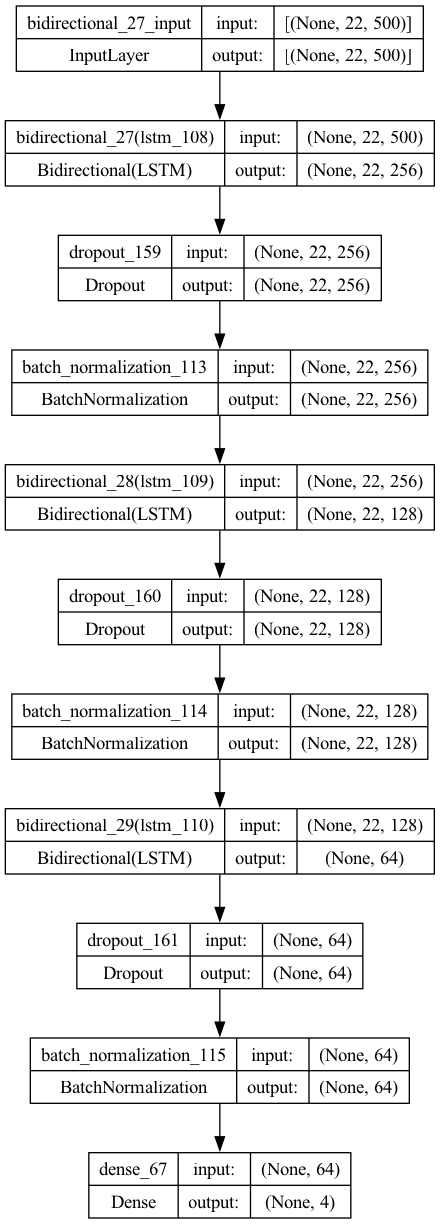

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

############ Hyperparams #############

hidden_size = 64
lr = 5e-3
num_epochs = 15
dropout = 0.5

############ LSTM Only Architecture #############


model = Sequential()
model._name = "Simple_LSTM"
# Add the first Bidirectional LSTM layer with dropout and kernel regularization
model.add(Bidirectional(LSTM(units=128, return_sequences=True, kernel_regularizer=l2(0.01)), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout))
model.add(BatchNormalization())

# Add a second Bidirectional LSTM layer with dropout and kernel regularization
model.add(Bidirectional(LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(dropout))
model.add(BatchNormalization())

# Add a third Bidirectional LSTM layer with dropout and kernel regularization
model.add(Bidirectional(LSTM(units=32, kernel_regularizer=l2(0.01))))
model.add(Dropout(dropout))
model.add(BatchNormalization())

# Add a dense layer for final classification
model.add(Dense(units=4, activation='softmax'))

'''
################### no regularization #################

model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(dropout))

# Add a second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(dropout))

# Add a third LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(dropout))

# Add a dense layer for final classification
model.add(Dense(units=4, activation='softmax'))
'''

# Compile the model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=lr), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
plot_model(model, to_file='../Gallery/LSTM_architecture.png', show_shapes=True, show_layer_names=True)




In [199]:

# load model in keras
# loaded_model = load_model('lstm_model.h5')

print(X_train.shape)
print(y_train.shape)

y_train_reshaped = np.argmax(y_train, axis=1)
y_val_reshaped = np.argmax(y_val, axis=1)
y_test_reshaped = np.argmax(y_test, axis=1)
print("reshape y", y_train_reshaped.shape)

# Training the model
history = model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    validation_data=(X_val, y_val), 
                    batch_size=batch_size,
                    )#callbacks=[early_stopping])

# Save the trained model
model.save('../Models/lstm_model2.h5')

(1615, 22, 500)
(1615, 4)
reshape y (1615,)
Epoch 1/15


ValueError: in user code:

    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1028, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 691, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 962, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,4].


# Base CNN Architecture

In [65]:
# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(500,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 167, 1, 25)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 167, 1, 25)       100       
 ormalization)                                                   
                                                                 
 dropout_12 (Dropout)        (None, 167, 1, 25)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 167, 1, 50)        12550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 1, 50)      

# CNN-LSTM Experiments

## Serial CNN-LSTM Architecture

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, LSTM, Dense

###############################################################################

# Input layer for the CNN model
cnn_input = Input(shape=(500, 1, 22))
#model.add(LSTM(30, return_sequences=True, stateful=False, input_shape=cnn_input))

# CNN model (M1)
cnn_model = basic_cnn_model(cnn_input)

# Input layer for the LSTM model
lstm_input = Input(shape=(22, 500))

# LSTM model (M2)
lstm_model = model(lstm_input)

# Concatenate the outputs of the CNN and LSTM models
combined = concatenate([cnn_model, lstm_model])
combined = Dense(64, activation='relu')(combined)

# Final dense layer for classification
output = Dense(4, activation='softmax')(combined)

combined_model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

'''
code: 
None, 22, 500

actual:
None, 1000, 22
'''

# Display the model summary
combined_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 500, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 input_15 (InputLayer)          [(None, 22, 500)]    0           []                               
                                                                                                  
 sequential_28 (Sequential)     (None, 4)            275479      ['input_14[0][0]']               
                                                                                                  
 sequential_42 (Sequential)     (None, 4)            384004      ['input_15[0][0]']         

## Custom CNN-LSTM Model

In [79]:
######################### CNN Layers ###################################

# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(500,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation

# Printing the model summary
#basic_cnn_model.summary()

######################### LSTM Layers ###################################

# New model
model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(dropout))

# Add a second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(dropout))

# Add a third LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(dropout))

# Add a dense layer for final classification
model.add(Dense(units=4, activation='softmax'))

lstm_model = model
#lstm_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 500, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 500, 1, 25)   5525        ['input_10[0][0]']               
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 167, 1, 25)  0           ['conv2d_26[0][0]']              
 )                                                                                                
                                                                                            

# Conv1D-LSTM

In [120]:
######################### Combined Model Basic ###################################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Activation, Dropout, BatchNormalization, MaxPooling1D, LSTM, Flatten, Dense


model = Sequential()

# CNN layers
model.add(Conv1D(40, kernel_size=12, strides=4, padding='same', input_shape=(22, 500)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4, strides=4, padding='same'))

# LSTM layers
model.add(LSTM(30, return_sequences=True, stateful=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(20, return_sequences=True, stateful=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Fully connected layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 40)             240040    
                                                                 
 activation_3 (Activation)   (None, 6, 40)             0         
                                                                 
 dropout_129 (Dropout)       (None, 6, 40)             0         
                                                                 
 batch_normalization_83 (Bat  (None, 6, 40)            160       
 chNormalization)                                                
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 2, 40)            0         
 1D)                                                             
                                                                 
 lstm_79 (LSTM)              (None, 2, 30)           

In [91]:
'''
# garbage model doesn't compile I hate dimensions
model = Sequential()

model.add(Conv2D(filters=25, kernel_size=(10, 1), padding='same', activation='elu', input_shape=(500, 1, 22)))
model.add(MaxPooling2D(pool_size=(3, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=50, kernel_size=(10, 1), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(3, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=100, kernel_size=(10, 1), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(3, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=200, kernel_size=(10, 1), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(3, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#model.summary()
#################################


# Add the first LSTM layer with dropout
model.add(Reshape((7, 1, 200), input_shape=(None, 7, 1, 200)))
model.add(Reshape((7, 200), input_shape=(7, 1, 200)))
model.add(LSTM(units=128, input_shape=(7, 1, 200), return_sequences=True))
model.add(Dropout(dropout))
model.add(BatchNormalization())

# Add a second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(dropout))
model.add(BatchNormalization())

# Add a third LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(dropout))
model.add(BatchNormalization())

############################

# Output layer with Softmax activation
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Printing the model summary
model.summary()

combined_model = model
'''

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 500, 1, 25)        5525      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 167, 1, 25)       0         
 g2D)                                                            
                                                                 
 batch_normalization_67 (Bat  (None, 167, 1, 25)       100       
 chNormalization)                                                
                                                                 
 dropout_97 (Dropout)        (None, 167, 1, 25)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 167, 1, 50)        12550     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 56, 1, 50)      

# Small Conv1D-LSTM Type [2]

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout

# Assuming 22 channels, 500 time steps, and 4 output classes
input_shape = (22, 500)

# Create the model
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# LSTM layer
model.add(LSTM(50, return_sequences=True))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))  # Assuming 4 output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

combined_model = model


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 20, 32)            48032     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                                 
 dropout_127 (Dropout)       (None, 10, 32)            0         
                                                                 
 lstm_78 (LSTM)              (None, 10, 50)            16600     
                                                                 
 dense_55 (Dense)            (None, 10, 64)            3264      
                                                                 
 dropout_128 (Dropout)       (None, 10, 64)            0         
                                                     

# Train Model

In [121]:
# Train combined model

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 4)

combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


print(X_train.shape)
print(y_train.shape)
print(y_train_reshaped.shape)
print(y_train_cat.shape)

print()
print(y_train[0])
print(y_train_reshaped[0])
print(y_train_cat[0])

history = combined_model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    validation_data=(X_val, y_val_reshaped), 
                    batch_size=batch_size,
                    )#callbacks=[early_stopping])

# Save the trained model
combined_model.save('combined_model.h5')

(1615, 22, 500)
(1615, 4)
(1615,)
(1615, 4, 4)

[1. 0. 0. 0.]
0
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Epoch 1/10


ValueError: in user code:

    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 10, 4) are incompatible


# Model Performance

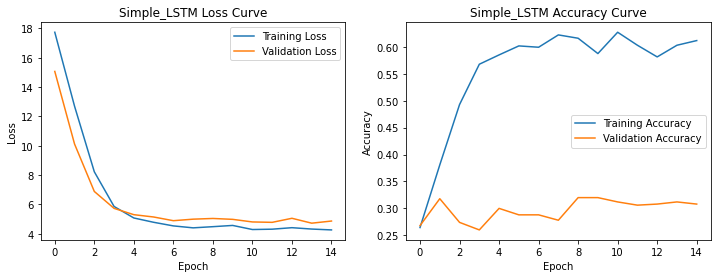

In [149]:
#history = history_cnn_lstm

# Plotting the loss curve and accuracy curve
plt.figure(figsize=(12, 4))

model_name = model._name if model._name else "Model"

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name} Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(f'../Gallery/{model_name} loss.png', dpi=150)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name} Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(f'../Gallery/{model_name} accuracy.png', dpi=150)
plt.legend()

plt.show()

In [152]:
## Testing the basic LSTM model

print(os.getcwd())
print("X test", X_test.shape)
print("y test", y_test.shape)

test_loss, test_acc = model.evaluate(X_test, y_test_reshaped) #y_test_reshaped, verbose=0)
print('Test accuracy of the basic LSTM model:', test_acc)

/Users/aaron68lee/Documents/Coding-Projects/EEG-DL/EEG-Data
X test (443, 22, 500)
y test (443, 4, 4)


TypeError: in user code:

    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1759, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 691, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/metrics/metrics.py", line 3672, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'


In [ ]:
def performance_metrics(true, predictions, labels):
    #loop over each row, and then get the index corresponding to the max probability
    predictions_class = []
    for prediction in predictions:
        for row in prediction:
            predictions_class.append(np.argmax(row))

    #repeat for the true labels
    true_class = []
    for true_row in true:
        for row in true_row:
            true_class.append(np.argmax(row))

    #calculate confusion matrix
    conf_mat = confusion_matrix(true_class, predictions_class)
    conf_mat = pd.DataFrame(conf_mat, columns=labels, index=labels)

    #calculate per class f1
    f1 = f1_score(true_class, predictions_class, average=None)
    f1 = pd.Series(f1, index=labels)

    return conf_mat, f1, predictions_class, true_class

In [ ]:
# Generate Confusion Matrix

